In [5]:
%load_ext autoreload
%autoreload 2

from mortgage import simulate_investment, calculate_stamp_duty, get_base_config# from mortgage import plot_results # (Assuming you create such a function)
base_config = get_base_config()
import copy # To safely modify config for different runs without altering the base_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# 2. Display or Review the Base Configuration (Optional, but good for clarity)
print("--- Base Configuration from mortgage.py ---")
for key, value in base_config.items():
    print(f"{key}: {value}")
print("-" * 40)

--- Base Configuration from mortgage.py ---
property_value_initial: 575000.0
buying_costs_percentage_other: 0.015
annual_property_appreciation_rate: 0.03
holding_period_years: 10
service_charge_annual_initial: 6500.0
ground_rent_annual: 200.0
council_tax_annual_initial: 2000.0
maintenance_allowance_annual: 600.0
insurance_annual: 300.0
service_charge_inflation_rate: 0.03
selling_costs_percentage: 0.02
deposit_percentage: 0.2
mortgage_interest_rate_annual: 0.045
mortgage_term_years: 25
mortgage_arrangement_fee: 1500.0
alternative_investment_return_rate_annual: 0.05
----------------------------------------


In [7]:
# 3. Run a Base Case Simulation (Example)
# You can modify the config for this specific run if needed,
# or use the base_config directly.

print("\n--- Running Base Case Simulation in Notebook ---")

# To run with base_config without modification:
cash_results_notebook_base = simulate_investment(**base_config, is_cash_purchase=True)
mortgage_results_notebook_base = simulate_investment(**base_config, is_cash_purchase=False)

# If you want to tweak a parameter for a specific notebook run:
# custom_config_notebook = base_config.copy() # Use copy.copy() for shallow or copy.deepcopy() for nested dicts
custom_config_notebook = copy.deepcopy(base_config) # Safer if config has nested structures
custom_config_notebook["annual_property_appreciation_rate"] = 0.035 # Example tweak
# custom_config_notebook["property_value_initial"] = 580000.0 # Another example
# cash_results_notebook_custom = simulate_investment(**custom_config_notebook, is_cash_purchase=True)
# mortgage_results_notebook_custom = simulate_investment(**custom_config_notebook, is_cash_purchase=False)




--- Running Base Case Simulation in Notebook ---



--- Summary for Cash Purchase (Base Case) (Notebook) ---
Initial Cash Outlay: £602,375.00
Final Property Value (Year 10): £772,751.92
Net Sale Proceeds from Property: £757,296.88
Remaining Mortgage at End: £0.00
Final Equity in Property: £757,296.88
Total Ongoing Property Costs Paid over 10 years: £108,442.97
Net Gain (Final Assets - Initial Outlay - All Running Costs): £46,478.91
Annualized ROI on Initial Cash Outlay: 0.75%

--- Summary for Mortgage Purchase (Base Case) (Notebook) ---
Initial Cash Outlay: £143,875.00
Final Property Value (Year 10): £772,751.92
Net Sale Proceeds from Property: £757,296.88
Remaining Mortgage at End: £336,456.55
Final Equity in Property: £420,840.33
Total Ongoing Property Costs Paid over 10 years: £108,442.97
Total Mortgage Interest Paid over 10 years: £184,064.47
Value of Alternative Investments at End: £749,291.53
Net Gain (Final Assets - Initial Outlay - All Running Costs): £733,749.42
Annualized ROI on Initial Cash Outlay: 19.82%


--- Sensitivity A

Matplotlib is building the font cache; this may take a moment.


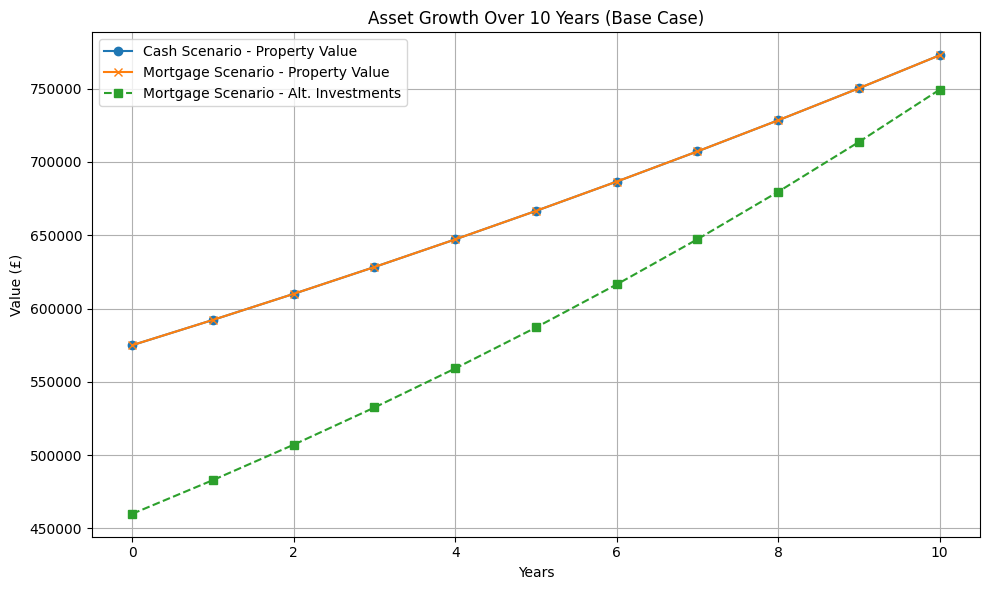

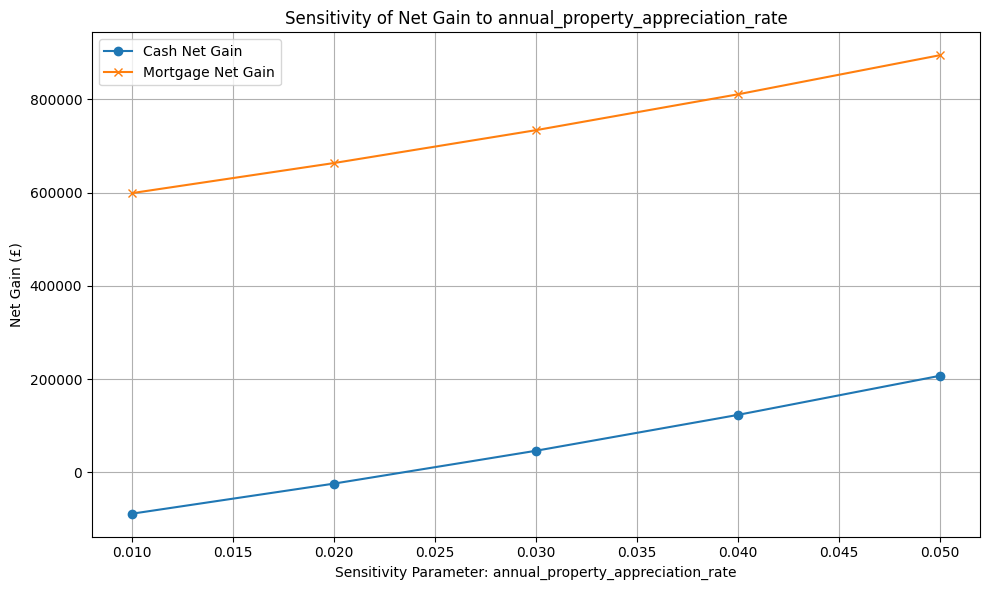


Notebook execution complete. You can now explore the results dictionaries (e.g., cash_results_notebook_base, mortgage_results_notebook_base) and the sensitivity_results list.


In [8]:
# 4. Define a function to print summaries (similar to the one in mortgage.py,
#    or you could import it if you made it a top-level function in mortgage.py)

def print_summary_notebook(results, scenario_name, holding_period):
    print(f"\n--- Summary for {scenario_name} (Notebook) ---")
    print(f"Initial Cash Outlay: £{results['initial_cash_outlay']:,.2f}")
    print(f"Final Property Value (Year {holding_period}): £{results['final_property_value']:,.2f}")
    print(f"Net Sale Proceeds from Property: £{results['net_proceeds_from_property_sale']:,.2f}")
    print(f"Remaining Mortgage at End: £{results['remaining_mortgage_balance_at_end']:,.2f}")
    print(f"Final Equity in Property: £{results['final_equity_in_property']:,.2f}")
    print(f"Total Ongoing Property Costs Paid over {holding_period} years: £{results['total_ongoing_property_costs_paid']:,.2f}")
    if not results['is_cash_purchase']:
        print(f"Total Mortgage Interest Paid over {holding_period} years: £{results['total_mortgage_interest_paid']:,.2f}")
        print(f"Value of Alternative Investments at End: £{results['value_of_alternative_investments_at_end']:,.2f}")

    net_gain = (
        results['final_equity_in_property'] +
        results['value_of_alternative_investments_at_end'] -
        results['initial_cash_outlay'] -
        results['total_ongoing_property_costs_paid'] -
        (results['total_mortgage_interest_paid'] if not results['is_cash_purchase'] else 0)
    )
    print(f"Net Gain (Final Assets - Initial Outlay - All Running Costs): £{net_gain:,.2f}")

    ending_value_of_investment_vehicle = results['initial_cash_outlay'] + net_gain
    if results['initial_cash_outlay'] > 0 and holding_period > 0:
        roi_annualized = ((ending_value_of_investment_vehicle / results['initial_cash_outlay']) ** (1/holding_period)) - 1
        print(f"Annualized ROI on Initial Cash Outlay: {roi_annualized:.2%}")
    else:
        print("Annualized ROI on Initial Cash Outlay: N/A")

# Print results from the base simulation run in the notebook
print_summary_notebook(cash_results_notebook_base, "Cash Purchase (Base Case)", base_config["holding_period_years"])
print_summary_notebook(mortgage_results_notebook_base, "Mortgage Purchase (Base Case)", base_config["holding_period_years"])

# print_summary_notebook(cash_results_notebook_custom, "Cash Purchase (Custom)", custom_config_notebook["holding_period_years"])
# print_summary_notebook(mortgage_results_notebook_custom, "Mortgage Purchase (Custom)", custom_config_notebook["holding_period_years"])


# 5. Perform Sensitivity Analysis (Example for one parameter)
print("\n\n--- Sensitivity Analysis in Notebook (Example for Property Appreciation) ---")
param_to_test = "annual_property_appreciation_rate"
test_values = [0.01, 0.02, 0.03, 0.04, 0.05] # Example values

results_sensitivity = []

for value in test_values:
    print(f"\n  Testing {param_to_test} = {value:.3f}")
    temp_config_sens = copy.deepcopy(base_config)
    temp_config_sens[param_to_test] = value

    cash_res_sens = simulate_investment(**temp_config_sens, is_cash_purchase=True)
    mort_res_sens = simulate_investment(**temp_config_sens, is_cash_purchase=False)

    net_gain_cash = (
        cash_res_sens['final_equity_in_property'] + cash_res_sens['value_of_alternative_investments_at_end'] -
        cash_res_sens['initial_cash_outlay'] - cash_res_sens['total_ongoing_property_costs_paid']
    )
    net_gain_mort = (
        mort_res_sens['final_equity_in_property'] + mort_res_sens['value_of_alternative_investments_at_end'] -
        mort_res_sens['initial_cash_outlay'] - mort_res_sens['total_ongoing_property_costs_paid'] -
        mort_res_sens['total_mortgage_interest_paid']
    )
    
    # Calculate ROIs for sensitivity
    roi_cash_sens, roi_mort_sens = None, None
    ending_val_cash = cash_res_sens['initial_cash_outlay'] + net_gain_cash
    if cash_res_sens['initial_cash_outlay'] > 0 and temp_config_sens["holding_period_years"] > 0:
         roi_cash_sens = ((ending_val_cash / cash_res_sens['initial_cash_outlay']) ** (1/temp_config_sens["holding_period_years"])) - 1

    ending_val_mort = mort_res_sens['initial_cash_outlay'] + net_gain_mort
    if mort_res_sens['initial_cash_outlay'] > 0 and temp_config_sens["holding_period_years"] > 0:
        roi_mort_sens = ((ending_val_mort / mort_res_sens['initial_cash_outlay']) ** (1/temp_config_sens["holding_period_years"])) - 1

    results_sensitivity.append({
        "param_value": value,
        "cash_net_gain": net_gain_cash,
        "mortgage_net_gain": net_gain_mort,
        "cash_roi": roi_cash_sens,
        "mortgage_roi": roi_mort_sens
    })
    print(f"    Cash Net Gain: £{net_gain_cash:,.0f}, Cash ROI: {roi_cash_sens:.2%}" if roi_cash_sens is not None else f"    Cash Net Gain: £{net_gain_cash:,.0f}")
    print(f"    Mortgage Net Gain: £{net_gain_mort:,.0f}, Mortgage ROI: {roi_mort_sens:.2%}" if roi_mort_sens is not None else f"    Mortgage Net Gain: £{net_gain_mort:,.0f}")


# 6. Plotting Results (Example using matplotlib directly in notebook)
# Ensure you have matplotlib installed: pip install matplotlib
import matplotlib.pyplot as plt

# Example: Plot property values over time from the base case
years_axis = list(range(base_config['holding_period_years'] + 1))

plt.figure(figsize=(10, 6))
plt.plot(years_axis, cash_results_notebook_base['property_values_over_time'], label="Cash Scenario - Property Value", marker='o')
plt.plot(years_axis, mortgage_results_notebook_base['property_values_over_time'], label="Mortgage Scenario - Property Value", marker='x')
if not mortgage_results_notebook_base['is_cash_purchase']: # Check if it's mortgage to plot alt investments
    plt.plot(years_axis, mortgage_results_notebook_base['alternative_investments_values_over_time'], label="Mortgage Scenario - Alt. Investments", marker='s', linestyle='--')

plt.xlabel("Years")
plt.ylabel("Value (£)")
plt.title(f"Asset Growth Over {base_config['holding_period_years']} Years (Base Case)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Example: Plot Net Gain from sensitivity analysis
if results_sensitivity: # Check if sensitivity analysis was run
    param_values_plot = [r['param_value'] for r in results_sensitivity]
    cash_gains_plot = [r['cash_net_gain'] for r in results_sensitivity]
    mortgage_gains_plot = [r['mortgage_net_gain'] for r in results_sensitivity]

    plt.figure(figsize=(10, 6))
    plt.plot(param_values_plot, cash_gains_plot, label="Cash Net Gain", marker='o')
    plt.plot(param_values_plot, mortgage_gains_plot, label="Mortgage Net Gain", marker='x')
    plt.xlabel(f"Sensitivity Parameter: {param_to_test}")
    plt.ylabel("Net Gain (£)")
    plt.title(f"Sensitivity of Net Gain to {param_to_test}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\nNotebook execution complete. You can now explore the results dictionaries "
      "(e.g., cash_results_notebook_base, mortgage_results_notebook_base) "
      "and the sensitivity_results list.")